# Linear Algebra on Pytorch 

-Professor: M.Sc.Saul Calderon.

- Authors: 
    - M. Sc. Saúl Calderón, Dr. Juan Esquivel. 

# Lineality
Scaling 
$$
 L\{\alpha f(x)\}= \alpha L\{f(x)\}
$$
Superposition
$$
 L\{f_1(x)+f_2(x)\}= L\{f_1(x)\}+L\{f_2(x)\}
$$

An operator $L\{\cdot\}$ with input functions $f$ with input variable $x \in \mathbb{R}$, with $\alpha, \beta \in \mathbb{R}$, define  a lineal system if:

$$
 L\{\alpha f_1(x)+\beta f_2(x)\}= \alpha L\{f_1(x)\}+\beta L\{f_2(x)\}
$$

In [0]:

def sigmoid(x):
  """
  Sample sigmoid function
  param x: input array
  return y: sigmoid output
  """
  y = 1 / (1 + torch.exp(-1 * x));
  return y;

def linealFunction(x):
  """
  Sample lineal function
  param x: input array
  return y: 5x
  """
  y = 5*x
  return y;


def checkLinearity(operator):
  
  x = torch.arange(0.0, 5.0, 0.1)
  
  #create series of values from -1 to 1, with step 0.01
  
  
  #samplescalars
  alpha = torch.randn(1,1);
  beta = torch.randn(1,1)
  #sample functions
  f1 = lambda x: x + 2
  f2 = lambda x: x * x
  
  #compute left and right side of the equation
  
  right = alpha * operator(f1(x)) + beta * operator(f2(x))
  left = operator(alpha * f1(x) + beta * f2(x))
  
  difference = torch.abs(right - left);
  
  
  sumDifference = difference.sum()
  #Is linear?
  return (sumDifference < 0.0001)
  
 


print("prueba1 ", checkLinearity(linealFunction))

print("prueba2 ", checkLinearity(sigmoid))



prueba1  tensor(1, dtype=torch.uint8)
prueba2  tensor(0, dtype=torch.uint8)


## Install Dependencies

In [0]:
# Since Collab is being used, it is necessary to install Pytorch
!pip install torch
import torch as torch

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm




## Dot product

Dot product between vectors  and vectors $w \in \mathbb{R}^{1\times3}$ and $v \in \mathbb{R}^{1\times3}$, is calculated as follows:

In [0]:
#def calculateAngleVectors(w, v):
 
  
#Select device
device = torch.device("cpu") 
# device = torch.device("cuda:0")


#create literal tensors
w = torch.tensor([1, 2, 3], device = device)
v = torch.tensor([5, 6, 7], device = device)
#create an array with values between X and Y, with a step of D
series = torch.arange(-1.0, 1.0, 0.01)




#.0 to ensure float tensors
a = torch.tensor([1.0, 0.0])
b = torch.tensor([0.0, 1.0])
#calculate angle between vectors
#angle = calculateAngleVectors(a, b)
#print("Angle between vectors: ", angle)

#random numbers
y = torch.randn(1, 3, dtype = torch.float)
#vector of ones
x = torch.ones(1,3, dtype = torch.float)

#to get tensor dimensions, we use shape
print(w.shape)
#Dot product
dotProduct = w.dot(v)
print("Dot product: ", dotProduct)
print(y)

torch.Size([3])
Dot product:  tensor(38)
tensor([[ 0.1885,  0.1667, -0.1377]])


In [0]:
v = torch.tensor([1.0, 2.0, 4.0])
a = torch.tensor([2.0, 2.0, 2.0])
w = torch.randn(1, 3)
c = v * a
serie = torch.arange(-1.0, 1.0, 0.1)
print(c)
print(c.shape)

tensor([2., 4., 8.])
torch.Size([3])


## Plot Hiperplane

To plot hiperplane given with input $\vec{x}, \vec{m}  \in \mathbb{R}^{3} $, including the bias


$$
 z = f(\vec{x}) = \vec{m} \cdot \vec{x}  $$

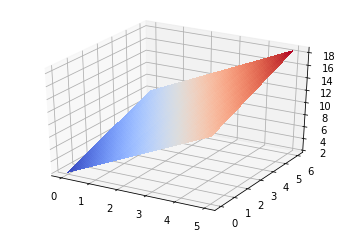

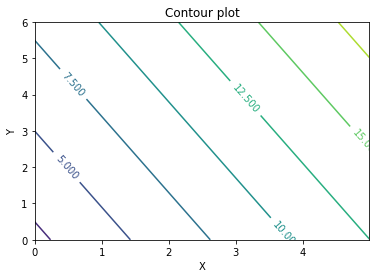

In [0]:
figure = plt.figure()
figureSurface = figure.gca(projection = '3d')
#create 1D tensors
step = 0.01
x = torch.arange(0.0, 5.0, step)
y = torch.arange(0.0, 6.0, step)
#Create 2D tensors with variation along the two axis
X,Y = torch.meshgrid(x, y)
#compute hiperplane function
Z = 2.1 * X + Y + 2
#create figure surface
surface = figureSurface.plot_surface(X.numpy(), Y.numpy(), Z.numpy(), cmap = cm.coolwarm,
                       linewidth=0, antialiased=False)
#
plt.show()

#plot contours

# Provide a title for the contour plot
plt.title('Contour plot')
# Set x axis label for the contour plot
plt.xlabel('X')
# Set y axis label for the contour plot
plt.ylabel('Y')
# Create contour lines or level curves using matplotlib.pyplot module
contours = plt.contour(X.numpy(), Y.numpy(), Z.numpy())
# Display z values on contour lines
plt.clabel(contours, inline=1, fontsize=10)
# Display the contour plot
plt.show()




## Gradient of plane calculation

In [0]:
# we need to divide by the step
(dX, dY) = np.gradient(Z.numpy()) 
dX = dX / step
dY = dY / step
print(dX)

[[2.0999908 2.0999908 2.0999908 ... 2.0999908 2.0999432 2.0999908]
 [2.1000028 2.1000028 2.1000028 ... 2.099967  2.099967  2.0999908]
 [2.1000028 2.1000028 2.1000028 ... 2.1000147 2.1000385 2.0999908]
 ...
 [2.0999908 2.0999908 2.0999908 ... 2.0999908 2.0999908 2.0999908]
 [2.0999908 2.0999908 2.0999908 ... 2.0999908 2.0999908 2.0999908]
 [2.0999908 2.0999908 2.0999908 ... 2.0999908 2.0999908 2.0999908]]


## Vector plotting
To plot a vector, we need to transform the pytorch tensors to numpy arrays, since most libraries use numpy. 
We build a matrix with a vector per row

[[2.10000277 0.99999905]]


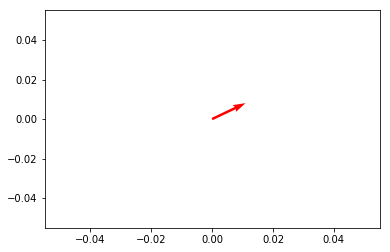

In [0]:

gradientVector = np.ones((1, 2))
#take the gradient vector at 1,1 in the gradient matrix
gradientVector[0, 0] = dX[1, 1]
gradientVector[0, 1] = dY[1, 1]
#gradient vector taken
print(gradientVector)

origin = [0] # origin point
#plot the 2D gradient vector
plt.quiver(origin, origin, gradientVector[:,0], gradientVector[:,1], color=['r','b','g'], scale=21)
plt.show()

##Porting vectors (1D tensors) to matrices (2D tensors)

We usually work with 2D tensors, thus is frequent to convert them to 2d tensors:

In [0]:
#row vector in 2D tensor
w2Drow = w.reshape(-1, w.shape[0])
#column vector in 2D tensor, -1 for n rows or columns
v2Dcolumn = v.reshape(v.shape[0], -1)
print(w2Drow)
print(v2Dcolumn)




## Element wise multiplication of matrices, and dot product of matrices
The dot product between to matrices $A\in \mathbb{R}^{2\times2}$ and $B \in \mathbb{R}^{2\times2}$, and

The element wise multiplication of matrices A and B result in a matrix C with same dimensions, and multiplies its entries.


In [0]:
A = torch.tensor([[1, 2], [3, 0]])
B = torch.tensor([[5, 6], [7, 0]])
C = A * B
print(C)
#Element wise multiplication allows us to calculate dot product of matrices
dotProduct = C.sum()
print("Dot product: ", dotProduct)

tensor([[ 5, 12],
        [21,  0]])
Dot product:  tensor(38)


## Matrix multiplication

Matrix multiplication C = A B can be interpreted as a dot product of the rows in A and the columns in B


In [0]:
C = A.mm(B)
print(C)

tensor([[19,  6],
        [15, 18]])


##Matrix and vector concatenation

In [0]:
#Create a matrix C, concatenating the matrix A along its rows
C = torch.cat((A, A), 0)
#Create a matrix D, concatenating the matrix A along its columns
D = torch.cat((B, B), 1)

#Put ceros in column 1 and 2, from row 0
C[0, 1:3] = 0;
print(C)


#Put ones in column 1 and all the rows
D[:, 1] = 1
print(D)


tensor([[1, 0],
        [3, 0],
        [1, 2],
        [3, 0]])
tensor([[5, 1, 5, 6],
        [7, 1, 7, 0]])
